In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC   # The SVM Classifier from Scikit
import seaborn as sns
% matplotlib inline

In [2]:
filename = 'winequality-red.csv'  #Download the file from https://archive.ics.uci.edu/ml/datasets/wine+quality
df = pd.read_csv(filename, sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#categorize wine quality in three levels
bins = (0,3.5,5.5,10)
categories = pd.cut(df['quality'], bins, labels = ['bad','ok','good'])
df['quality'] = categories



In [5]:
#categorize wine quality in two levels
#bins = (0,5.5,10)
#categories = pd.cut(df['quality'], bins, labels = ['bad','good'])
#df['quality'] = categories



In [6]:
df['quality'].value_counts()

good    855
ok      734
bad      10
Name: quality, dtype: int64

In [7]:
# Preprocessing and splitting data to X and y
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 323)

In [8]:
classifier = SVC(kernel = 'rbf', random_state = 45)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

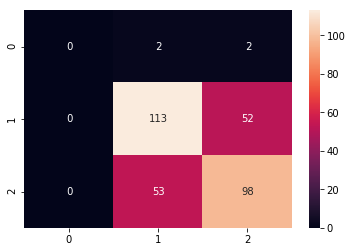

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [10]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.659375
